In [ ]:
# Shamecca Marshall
# Data 608
# Story 1

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
funding_ds = pd.read_csv(https://raw.githubusercontent.com/Meccamarshall/Data608/main/Week2/IIJA%20FUNDING%20AS%20OF%20MARCH%202023.csv")
funding_ds.head(n=10)

,"State, Teritory or Tribal Nation",Total (Billions)
0,ALABAMA,3.0000
1,ALASKA,3.7000
2,AMERICAN SAMOA,0.0686
3,ARIZONA,3.5000
4,ARKANSAS,2.8000
5,CALIFORNIA,18.4000
6,COLORADO,3.2000
7,CONNECTICUT,2.5000
8,DELEWARE,0.7920
9,DISTRICT OF COLUMBIA,1.1000


In [72]:
funding_ds.dtypes

State, Teritory or Tribal Nation     object
Total (Billions)                    float64
dtype: object

In [73]:
funding_ds.rename(columns={"State, Teritory or Tribal Nation": "STATE", "Total (Billions)": "FUNDING"}, inplace=True)
funding_ds = funding_ds.astype({'STATE' : 'string'})
funding_ds.dtypes

STATE       string
FUNDING    float64
dtype: object

In [74]:
funding_ds = funding_ds[funding_ds['STATE'] != 'AMERICAN SAMOA']
funding_ds = funding_ds.reset_index(drop=True)
funding_ds.head(n=10)

,STATE,FUNDING
0,ALABAMA,3.000
1,ALASKA,3.700
2,ARIZONA,3.500
3,ARKANSAS,2.800
4,CALIFORNIA,18.400
5,COLORADO,3.200
6,CONNECTICUT,2.500
7,DELEWARE,0.792
8,DISTRICT OF COLUMBIA,1.100
9,FLORIDA,8.200


In [101]:
election2020_ds = pd.read_csv("https://raw.githubusercontent.com/Meccamarshall/Data608/main/Week2/2020_Presidential_Elections.csv", skip_blank_lines=True)
election2020_ds.head(n = 5)

,STATE,BIDEN,TRUMP
0,NaN,(D),(R)
1,Alabama,36.57%,62.03%
2,Alaska,42.77%,52.83%
3,Arizona,49.36%,49.06%
4,Arkansas,34.78%,62.40%


In [102]:
election2020_ds = election2020_ds.drop([0])
election2020_ds.head(n=10)

,STATE,BIDEN,TRUMP
1,Alabama,36.57%,62.03%
2,Alaska,42.77%,52.83%
3,Arizona,49.36%,49.06%
4,Arkansas,34.78%,62.40%
5,California,63.48%,34.32%
6,Colorado,55.40%,41.90%
7,Connecticut,59.26%,39.19%
8,Delaware,58.74%,39.77%
9,D.C.,92.15%,5.40%
10,Florida,47.86%,51.22%


In [103]:
election2020_ds.tail(n=10)

,STATE,BIDEN,TRUMP
47,Virginia,54.11%,44.00%
48,Washington,57.97%,38.77%
49,West Virginia,29.69%,68.62%
50,Wisconsin,49.45%,48.82%
51,Wyoming,26.55%,69.94%
52,Total Percentage of Popular Vote:,NaN,NaN
53,NaN,51.31%,46.85%
54,NaN,NaN,NaN
55,NaN,NaN,NaN
56,Note: The winning candidate percentage in eac...,NaN,NaN


In [104]:
election2020_ds = election2020_ds.drop([i for i in range(51, 56)])
election2020_ds = election2020_ds.reset_index(drop=True)
election2020_ds.tail(n=10)

,STATE,BIDEN,TRUMP
41,South Dakota,35.61%,61.77%
42,Tennessee,37.45%,60.66%
43,Texas,46.48%,52.06%
44,Utah,37.65%,58.13%
45,Vermont,66.09%,30.67%
46,Virginia,54.11%,44.00%
47,Washington,57.97%,38.77%
48,West Virginia,29.69%,68.62%
49,Wisconsin,49.45%,48.82%
50,Note: The winning candidate percentage in eac...,NaN,NaN


In [105]:
election2020_ds['BIDEN'] = election2020_ds['BIDEN'].str.replace('%', '', regex=False)
election2020_ds['TRUMP'] = election2020_ds['TRUMP'].str.replace('%', '', regex=False)
election2020_ds.head(n=10)

,STATE,BIDEN,TRUMP
0,Alabama,36.57,62.03
1,Alaska,42.77,52.83
2,Arizona,49.36,49.06
3,Arkansas,34.78,62.40
4,California,63.48,34.32
5,Colorado,55.40,41.90
6,Connecticut,59.26,39.19
7,Delaware,58.74,39.77
8,D.C.,92.15,5.40
9,Florida,47.86,51.22


In [106]:
election2020_ds['STATE'] = election2020_ds['STATE'].str.upper()
election2020_ds['STATE'] = election2020_ds['STATE'].str.replace('D.C.', 'DISTRICT OF COLUMBIA', regex=False)
election2020_ds.head(n=10)

,STATE,BIDEN,TRUMP
0,ALABAMA,36.57,62.03
1,ALASKA,42.77,52.83
2,ARIZONA,49.36,49.06
3,ARKANSAS,34.78,62.40
4,CALIFORNIA,63.48,34.32
5,COLORADO,55.40,41.90
6,CONNECTICUT,59.26,39.19
7,DELAWARE,58.74,39.77
8,DISTRICT OF COLUMBIA,92.15,5.40
9,FLORIDA,47.86,51.22


In [107]:
election2020_ds = election2020_ds.astype({'STATE': 'string', 'BIDEN': 'float', 'TRUMP' : 'float'})
election2020_ds.dtypes

STATE     string
BIDEN    float64
TRUMP    float64
dtype: object

In [108]:
election2020_ds['BIDEN_WON'] = election2020_ds.apply(lambda row: 'YES' if row.BIDEN > row.TRUMP else 'NO', axis=1)
election2020_ds = election2020_ds.astype({'BIDEN_WON' : 'string'})

election2020_ds['COLOR'] = election2020_ds.apply(lambda row: 'blue' if row.BIDEN_WON == 'YES' else 'red', axis=1)
election2020_ds = election2020_ds.astype({'COLOR' : 'string'})
election2020_ds.head(10)

,STATE,BIDEN,TRUMP,BIDEN_WON,COLOR
0,ALABAMA,36.57,62.03,NO,red
1,ALASKA,42.77,52.83,NO,red
2,ARIZONA,49.36,49.06,YES,blue
3,ARKANSAS,34.78,62.40,NO,red
4,CALIFORNIA,63.48,34.32,YES,blue
5,COLORADO,55.40,41.90,YES,blue
6,CONNECTICUT,59.26,39.19,YES,blue
7,DELAWARE,58.74,39.77,YES,blue
8,DISTRICT OF COLUMBIA,92.15,5.40,YES,blue
9,FLORIDA,47.86,51.22,NO,red


In [135]:
population_ds = pd.read_csv("https://raw.githubusercontent.com/Meccamarshall/Data608/main/Week2/NST_EST2023_POP.csv", skip_blank_lines=True)
population_ds.head(n=10)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN
1,Geographic Area,"April 1, 2020 Estimates Base",Population Estimate (as of July 1),NaN,NaN
2,NaN,NaN,2021,2022,2023
3,United States,"331,464,948","332,048,977","333,271,411","334,914,895"
4,Northeast,"57,614,141","57,243,423","57,026,847","56,983,517"
5,Midwest,"68,987,296","68,850,246","68,783,028","68,909,283"
6,South,"126,268,529","127,353,282","128,702,030","130,125,290"
7,West,"78,594,982","78,602,026","78,759,506","78,896,805"
8,.Alabama,"5,024,294","5,050,380","5,073,903","5,108,468"
9,.Alaska,"733,374","734,923","733,276","733,406"


In [136]:
population_ds = population_ds.drop([i for i in range(0, 8)])
population_ds = population_ds.reset_index(drop=True)
population_ds.head(n=10)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,.Alabama,"5,024,294","5,050,380","5,073,903","5,108,468"
1,.Alaska,"733,374","734,923","733,276","733,406"
2,.Arizona,"7,157,902","7,272,487","7,365,684","7,431,344"
3,.Arkansas,"3,011,490","3,028,443","3,046,404","3,067,732"
4,.California,"39,538,212","39,145,060","39,040,616","38,965,193"
5,.Colorado,"5,773,707","5,811,596","5,841,039","5,877,610"
6,.Connecticut,"3,605,912","3,603,691","3,608,706","3,617,176"
7,.Delaware,"989,946","1,004,881","1,019,459","1,031,890"
8,.District of Columbia,"689,548","669,037","670,949","678,972"
9,.Florida,"21,538,216","21,830,708","22,245,521","22,610,726"


In [137]:
population_ds = population_ds.drop(columns = [col for col in population_ds.columns if col in ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']])
population_ds.columns = ["STATE", "POPULATION"]
population_ds.tail(n=10)

,STATE,POPULATION
48,.West Virginia,"1,770,071"
49,.Wisconsin,"5,910,955"
50,.Wyoming,"584,057"
51,NaN,NaN
52,.Puerto Rico,"3,205,691"
53,Note: The estimates are developed from a base ...,NaN
54,Suggested Citation:,NaN
55,Annual Estimates of the Resident Population fo...,NaN
56,"Source: U.S. Census Bureau, Population Division",NaN
57,Release Date: December 2023,NaN


In [138]:
population_ds = population_ds.drop([i for i in range(51, 58)])

population_ds['STATE'] = population_ds['STATE'].str.replace('.', '', regex=False)
population_ds['STATE'] = population_ds['STATE'].str.upper()
population_ds = population_ds.astype({'STATE' : 'string'})

population_ds['POPULATION'] = population_ds['POPULATION'].str.replace(',', '', regex=False)
population_ds = population_ds.astype({'POPULATION' : 'int'})

population_ds = population_ds.reset_index(drop=True)
population_ds.tail(n=10)

,STATE,POPULATION
41,SOUTH DAKOTA,919318
42,TENNESSEE,7126489
43,TEXAS,30503301
44,UTAH,3417734
45,VERMONT,647464
46,VIRGINIA,8715698
47,WASHINGTON,7812880
48,WEST VIRGINIA,1770071
49,WISCONSIN,5910955
50,WYOMING,584057


In [ ]:
population_ds.dtypes

<BarContainer object of 51 artists>

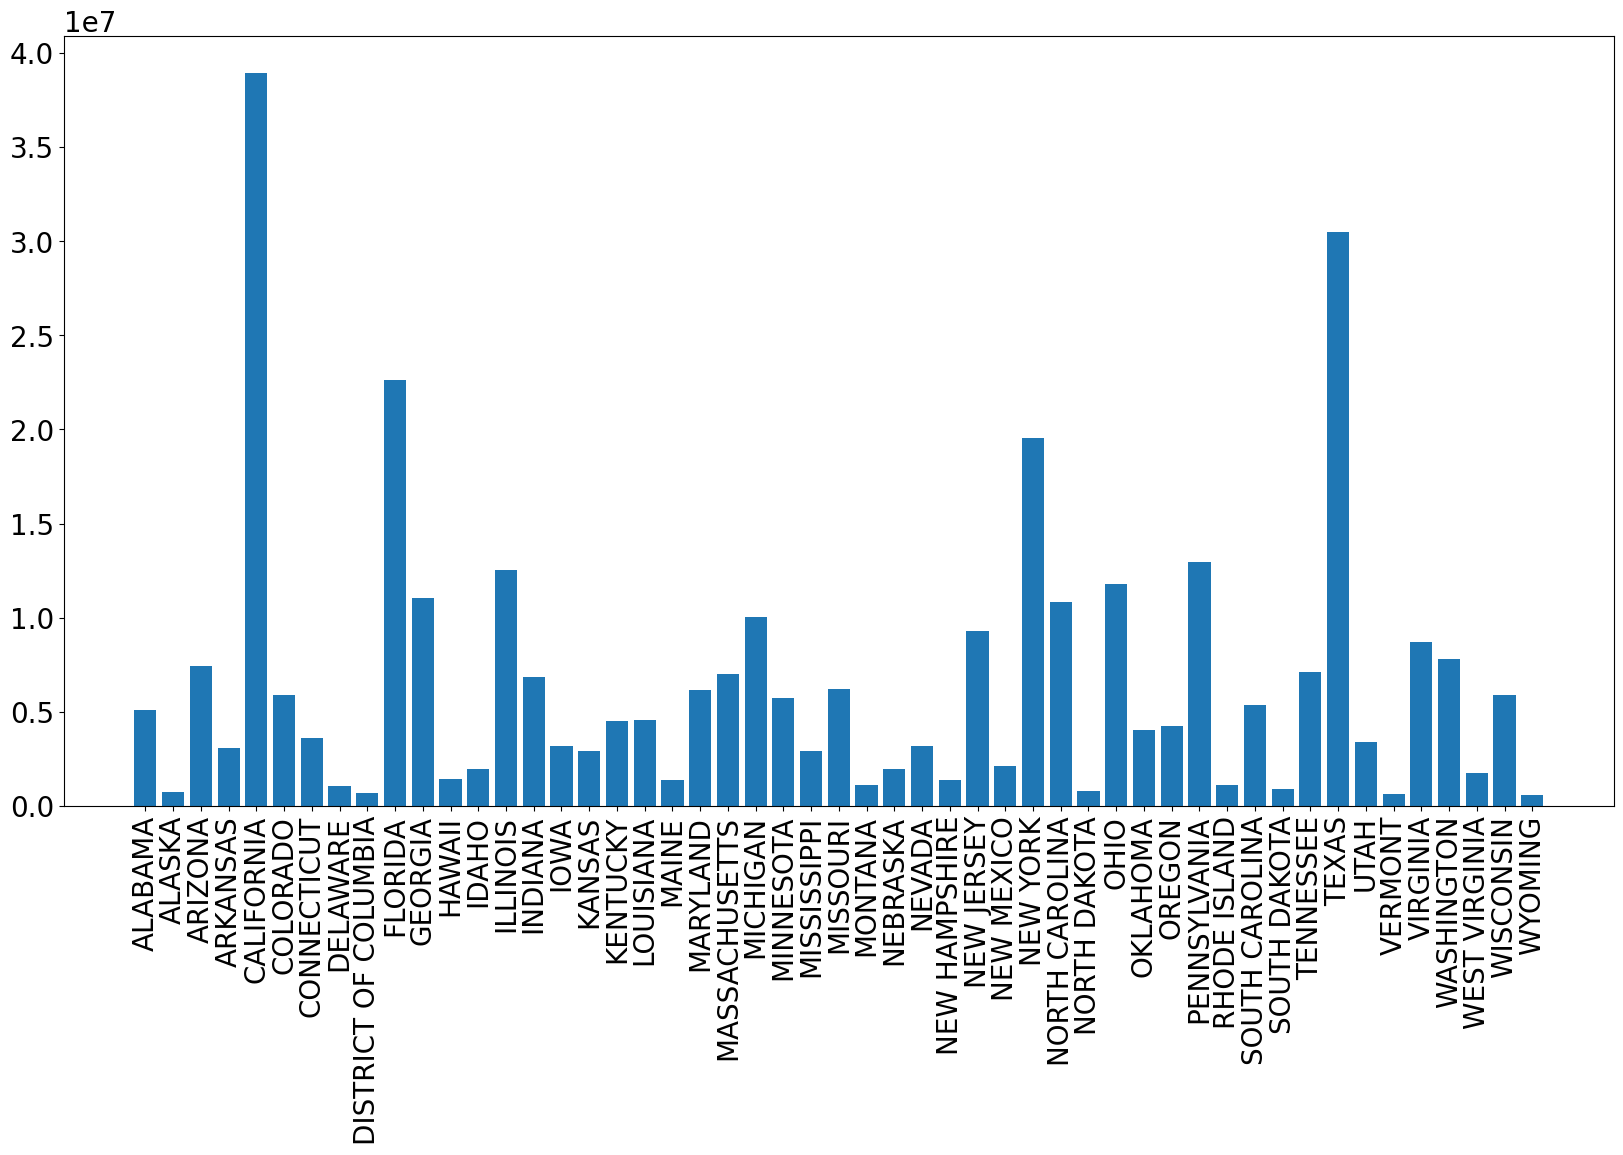

In [139]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = '20'
plt.xticks(rotation = 'vertical')
plt.bar(population_ds['STATE'],
        population_ds['POPULATION'])

<BarContainer object of 56 artists>

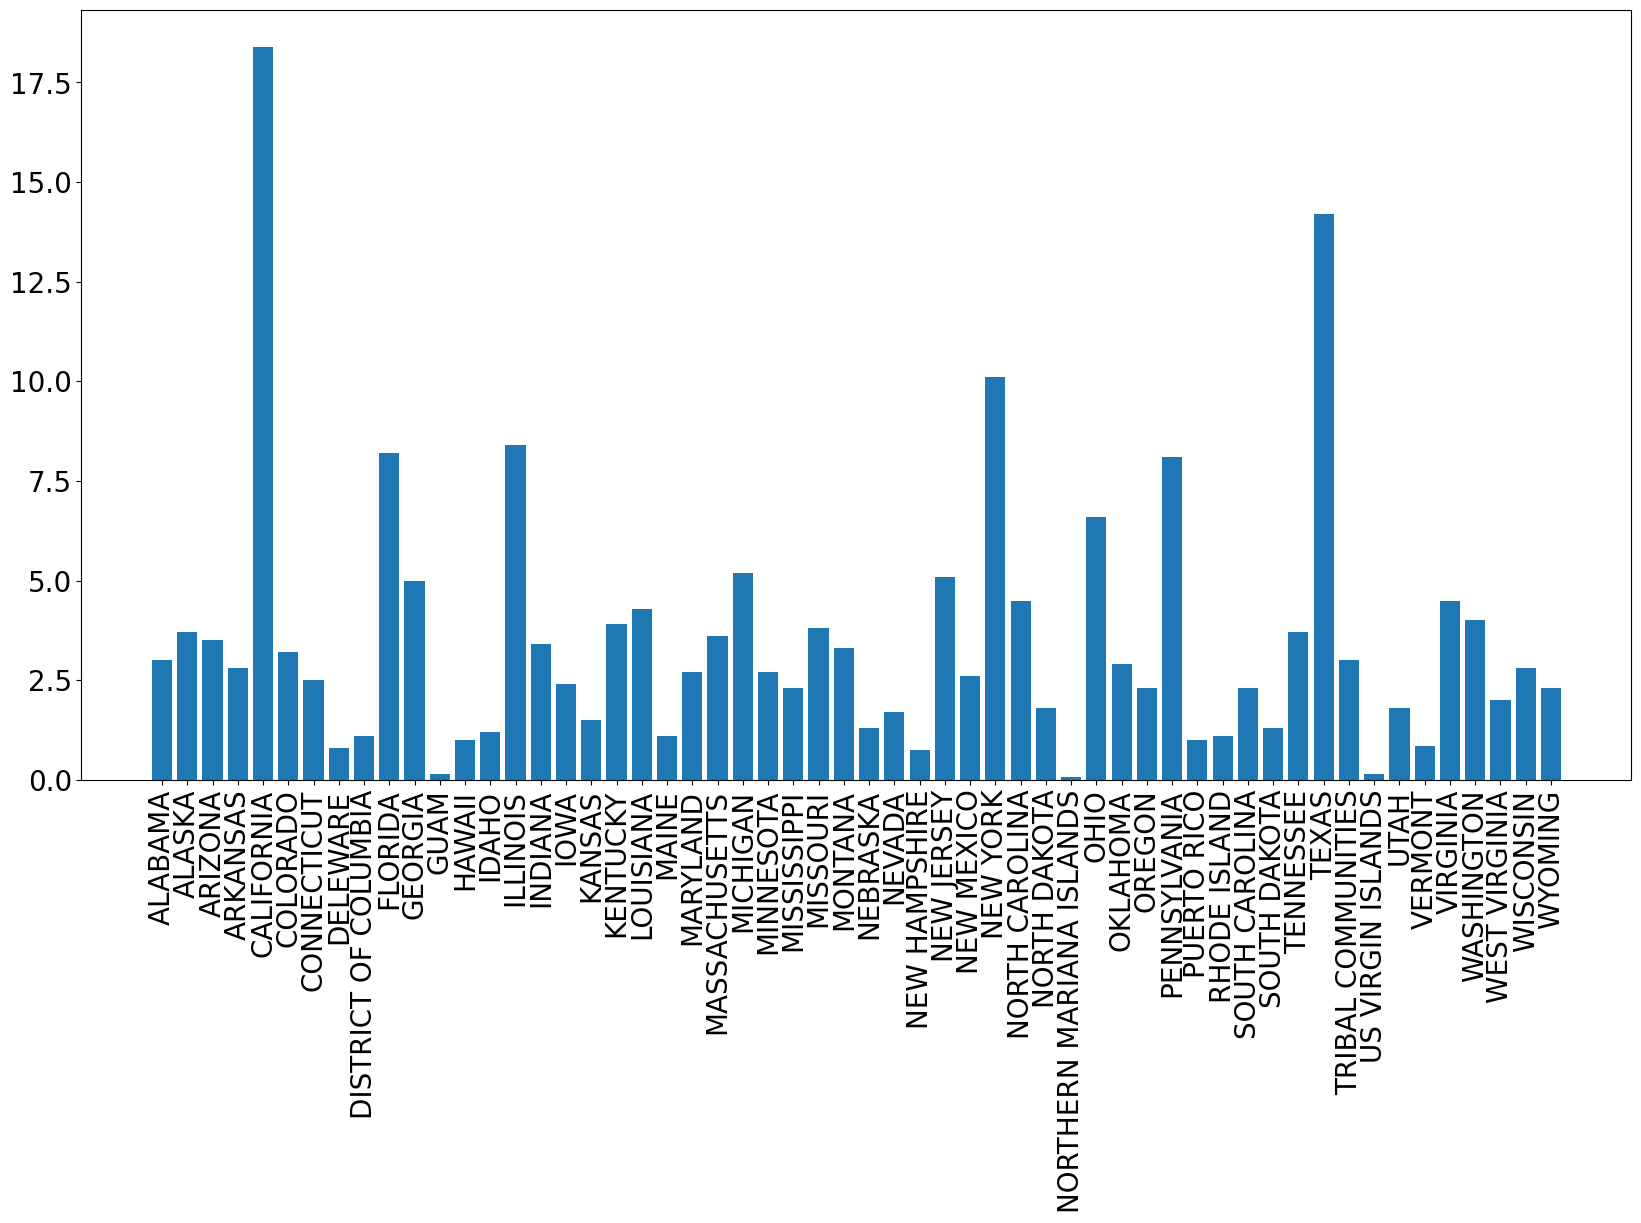

In [140]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = '20'
plt.xticks(rotation = 'vertical')
plt.bar(funding_ds['STATE'],
        funding_ds['FUNDING'])

In [141]:
funding_ds.head()

,STATE,FUNDING
0,ALABAMA,3.0
1,ALASKA,3.7
2,ARIZONA,3.5
3,ARKANSAS,2.8
4,CALIFORNIA,18.4


In [142]:
comp = pd.merge(funding_ds, population_ds, how="outer", on=["STATE"], copy=True)
comp = comp.dropna()
comp = comp.astype({'POPULATION' : 'int'})
comp.head()

,STATE,FUNDING,POPULATION
0,ALABAMA,3.0,5108468
1,ALASKA,3.7,733406
2,ARIZONA,3.5,7431344
3,ARKANSAS,2.8,3067732
4,CALIFORNIA,18.4,38965193


In [143]:
state_funding_percapita = pd.merge(comp, election2020_ds, how="outer", on=["STATE"], copy=True)
state_funding_percapita = state_funding_percapita.dropna()
state_funding_percapita = state_funding_percapita.astype({'POPULATION' : 'int'})
state_funding_percapita = state_funding_percapita.drop(columns=["BIDEN", "TRUMP"])
state_funding_percapita.dtypes

STATE          string
FUNDING       float64
POPULATION      int64
BIDEN_WON      string
COLOR          string
dtype: object

In [144]:
state_funding_percapita['PER_CAPITA_FUNDING'] = state_funding_percapita.apply(lambda row: (row.FUNDING * 1000000000) / row.POPULATION, axis=1)
state_funding_percapita.head(n=10)

,STATE,FUNDING,POPULATION,BIDEN_WON,COLOR,PER_CAPITA_FUNDING
0,ALABAMA,3.0,5108468,NO,red,587.260212
1,ALASKA,3.7,733406,NO,red,5044.954636
2,ARIZONA,3.5,7431344,YES,blue,470.978063
3,ARKANSAS,2.8,3067732,NO,red,912.726405
4,CALIFORNIA,18.4,38965193,YES,blue,472.216319
5,COLORADO,3.2,5877610,YES,blue,544.438981
6,CONNECTICUT,2.5,3617176,YES,blue,691.146906
7,DISTRICT OF COLUMBIA,1.1,678972,YES,blue,1620.096263
8,FLORIDA,8.2,22610726,NO,red,362.659739
9,GEORGIA,5.0,11029227,YES,blue,453.340928


In [145]:
# Is the allocation equitable based on the population of each of the States and Territories, or is bias apparent?

In [151]:
# Due to the IIJA funding comprising both formulaic and discretionary elements, the correlation between funding and population is not anticipated to be strictly linear. Examining a scatterplot depicting State funding based on population reveals a trend indicating that, overall, states with larger populations tend to receive more substantial funding.

SyntaxError: invalid syntax (4182545168.py, line 1)

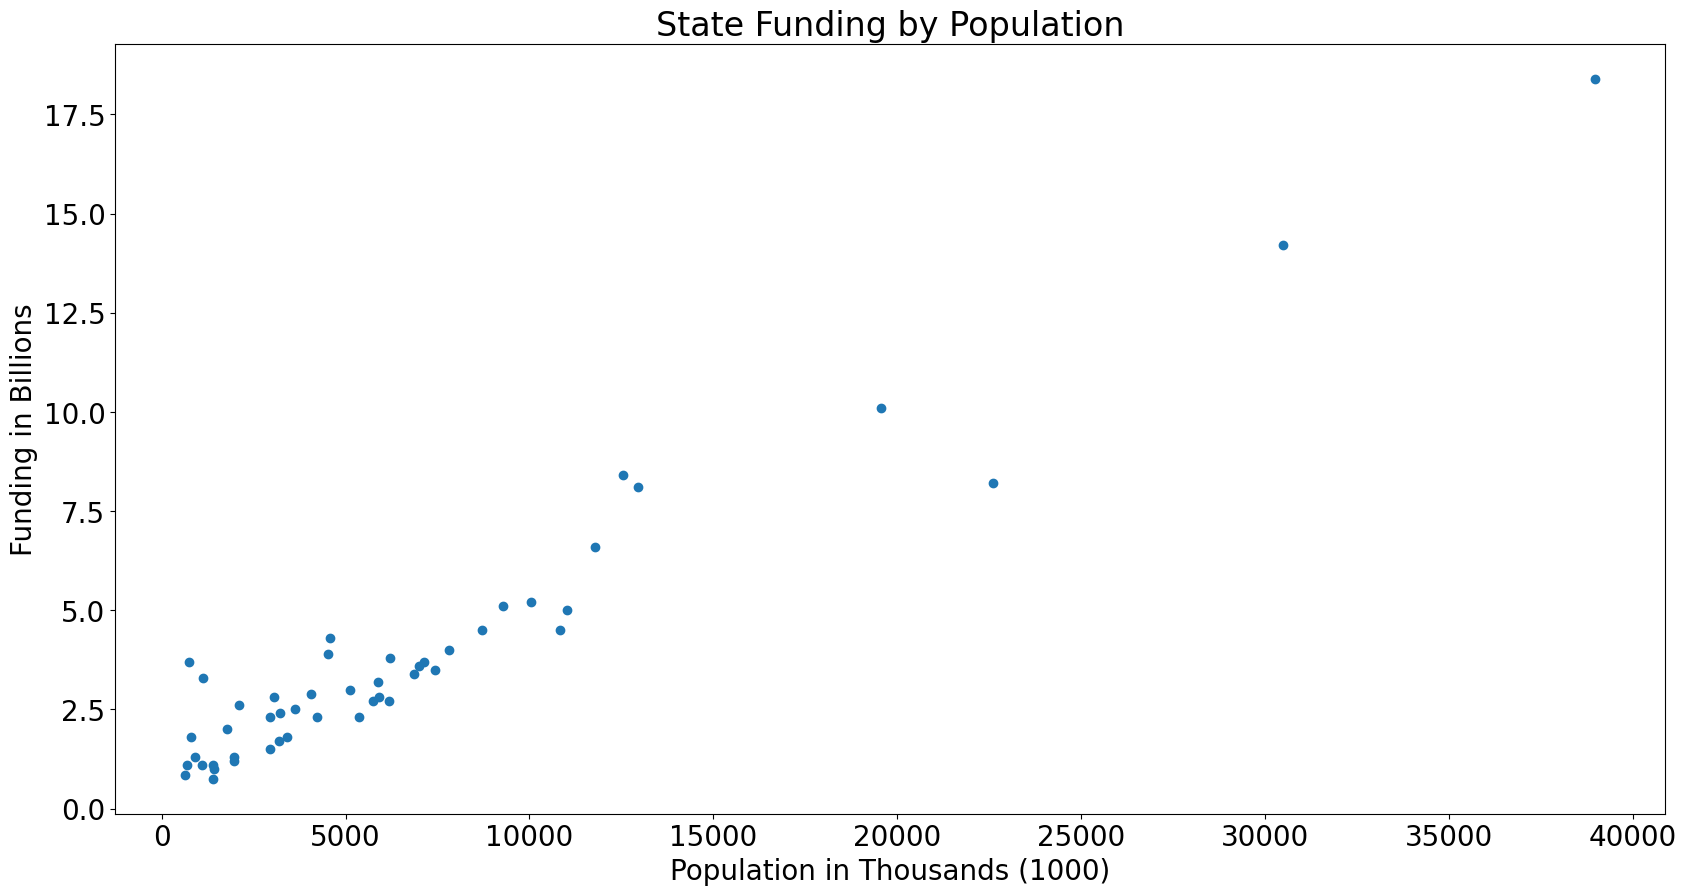

In [147]:
x = state_funding_percapita['POPULATION'] / 1000
y = state_funding_percapita['FUNDING']
plt.scatter(x, y)
plt.title('State Funding by Population')
plt.xlabel('Population in Thousands (1000)')
plt.ylabel('Funding in Billions')
plt.show()

In [ ]:
# Yet, a more detailed analysis of the residual plot exposes a deviation from the assumptions of linear regression. The presence of structure is evident in the red Lowess line.

In [ ]:
sns.residplot(x="POPULATION", y="FUNDING", data=state_funding_percapita, lowess=True, order=1, line_kws={'color': 'red'});

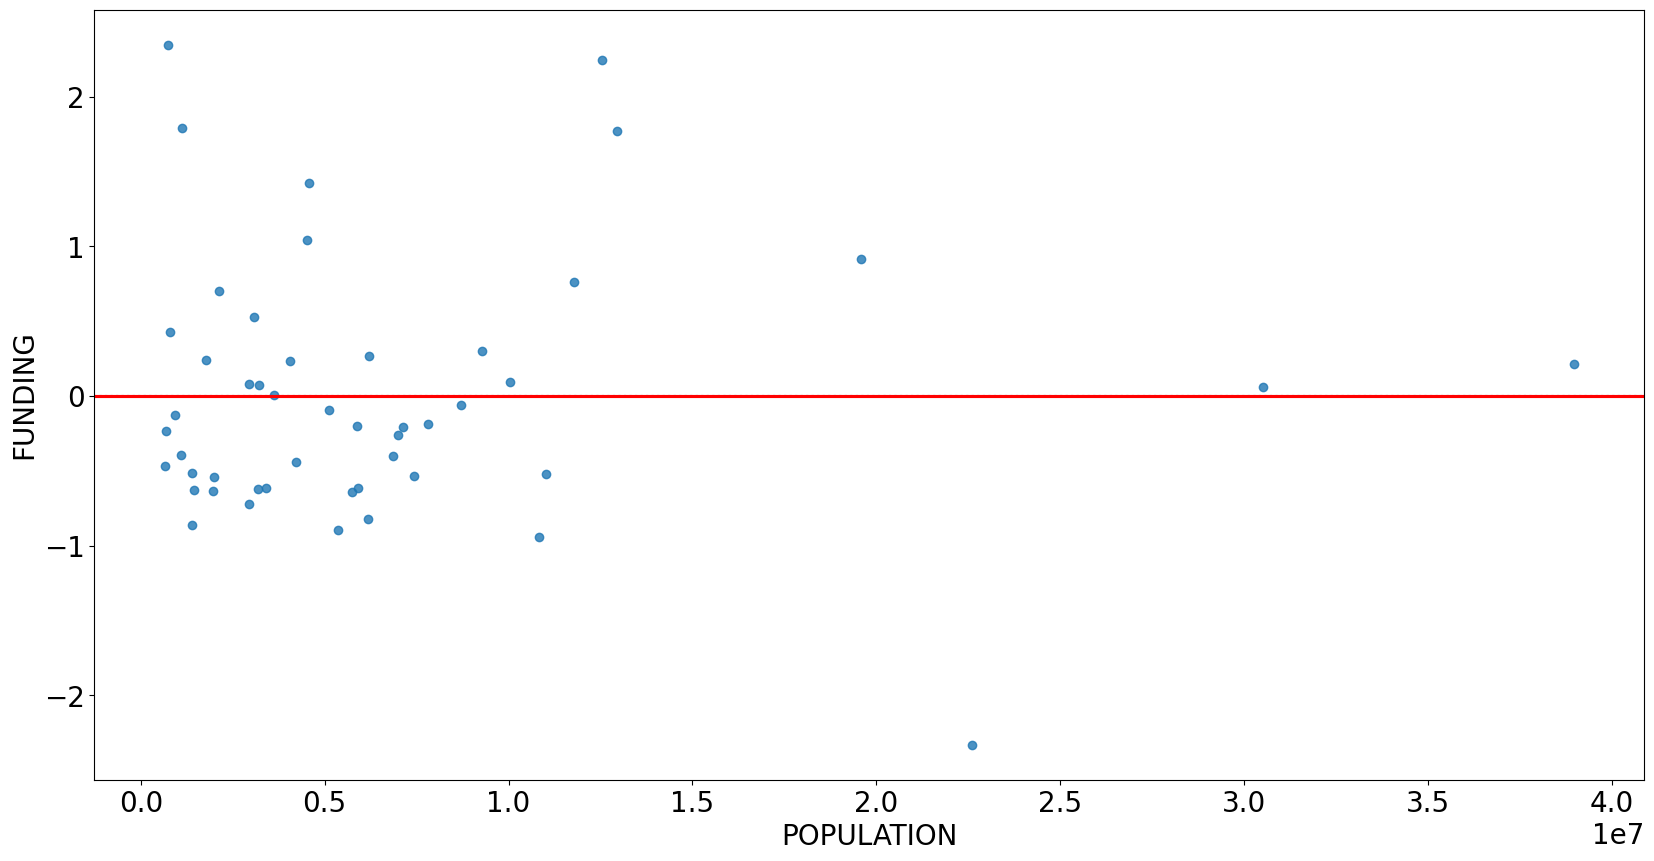

In [148]:
sns.residplot(x="POPULATION", y="FUNDING", data=state_funding_percapita, lowess=True, order=2, line_kws={'color': 'red'});

In [ ]:
# The subsequent scatterplot, accompanied by a higher-order regression line, indicates a connection between State funding and population without any discernible biases.

[Text(0.5, 0, 'Population in Thousands (1000)'),
 Text(0, 0.5, 'Funding in Billions'),
 Text(0.5, 1.0, 'State Funding by Population')]

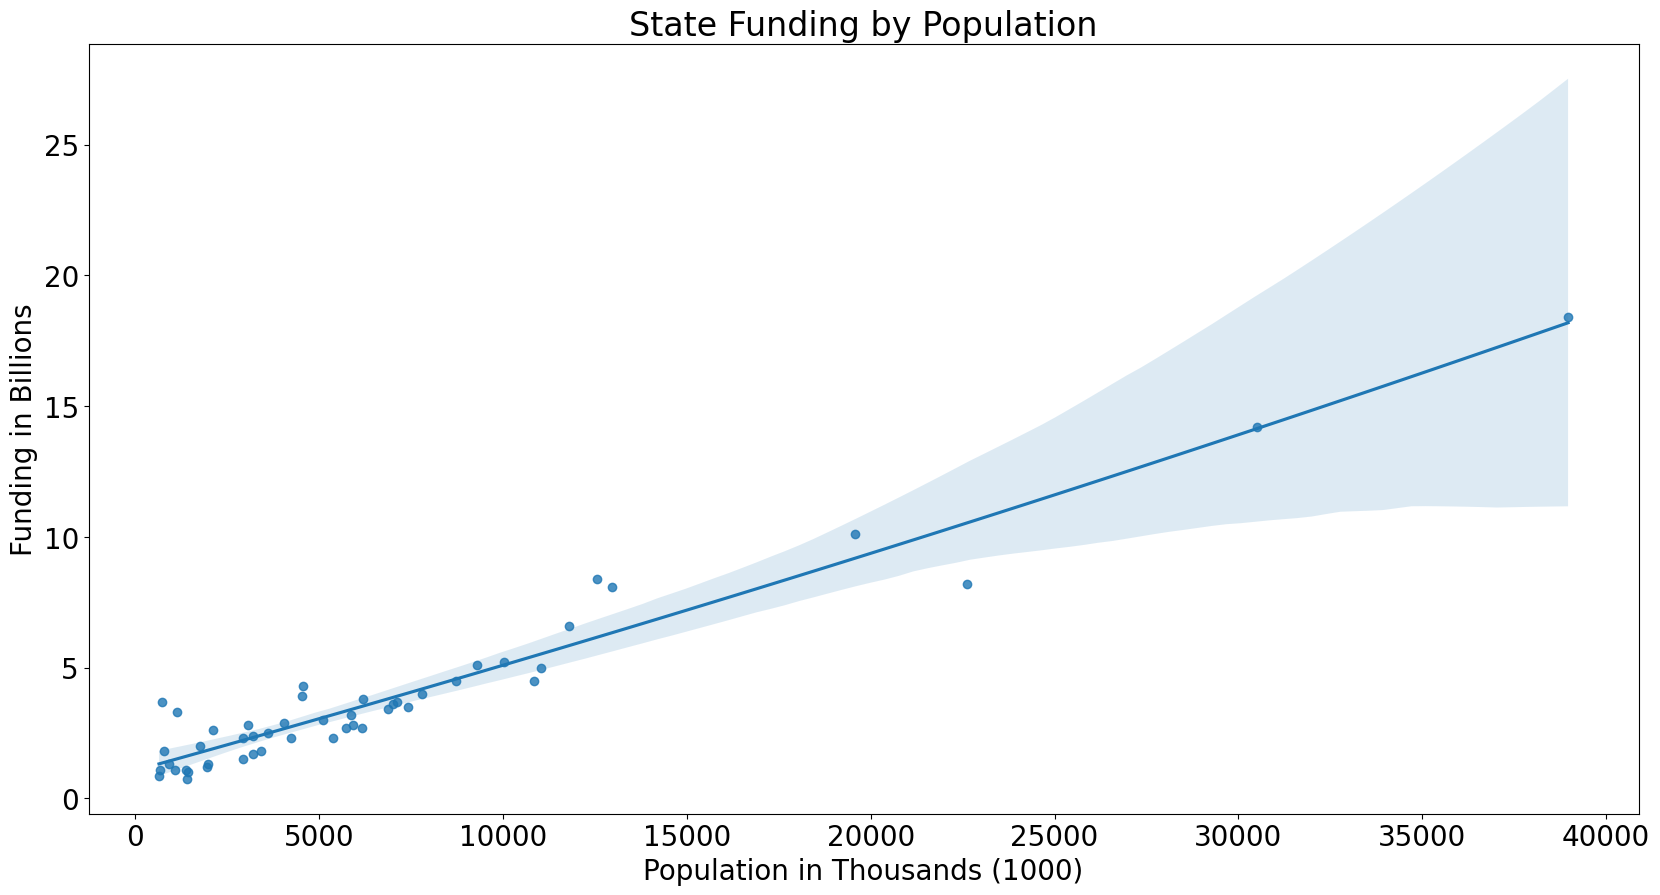

In [149]:
# library & dataset
import seaborn as sns

# use the function regplot to make a scatterplot
p = sns.regplot(data=state_funding_percapita, x=x, y=y, order=2, truncate=True)
p.set(xlabel='Population in Thousands (1000)', ylabel='Funding in Billions', title='State Funding by Population')

In [ ]:
# In the fiercely contested 2020 US Presidential election that resulted in the election of a Democratic President, Democrats emerged victorious in 25 states, while Republicans claimed 24.
# If funding exhibited a bias favoring the political interests of the Biden administration, it would be anticipated that states voting for the Democratic candidate would receive a significant portion of the funding.

<BarContainer object of 30 artists>

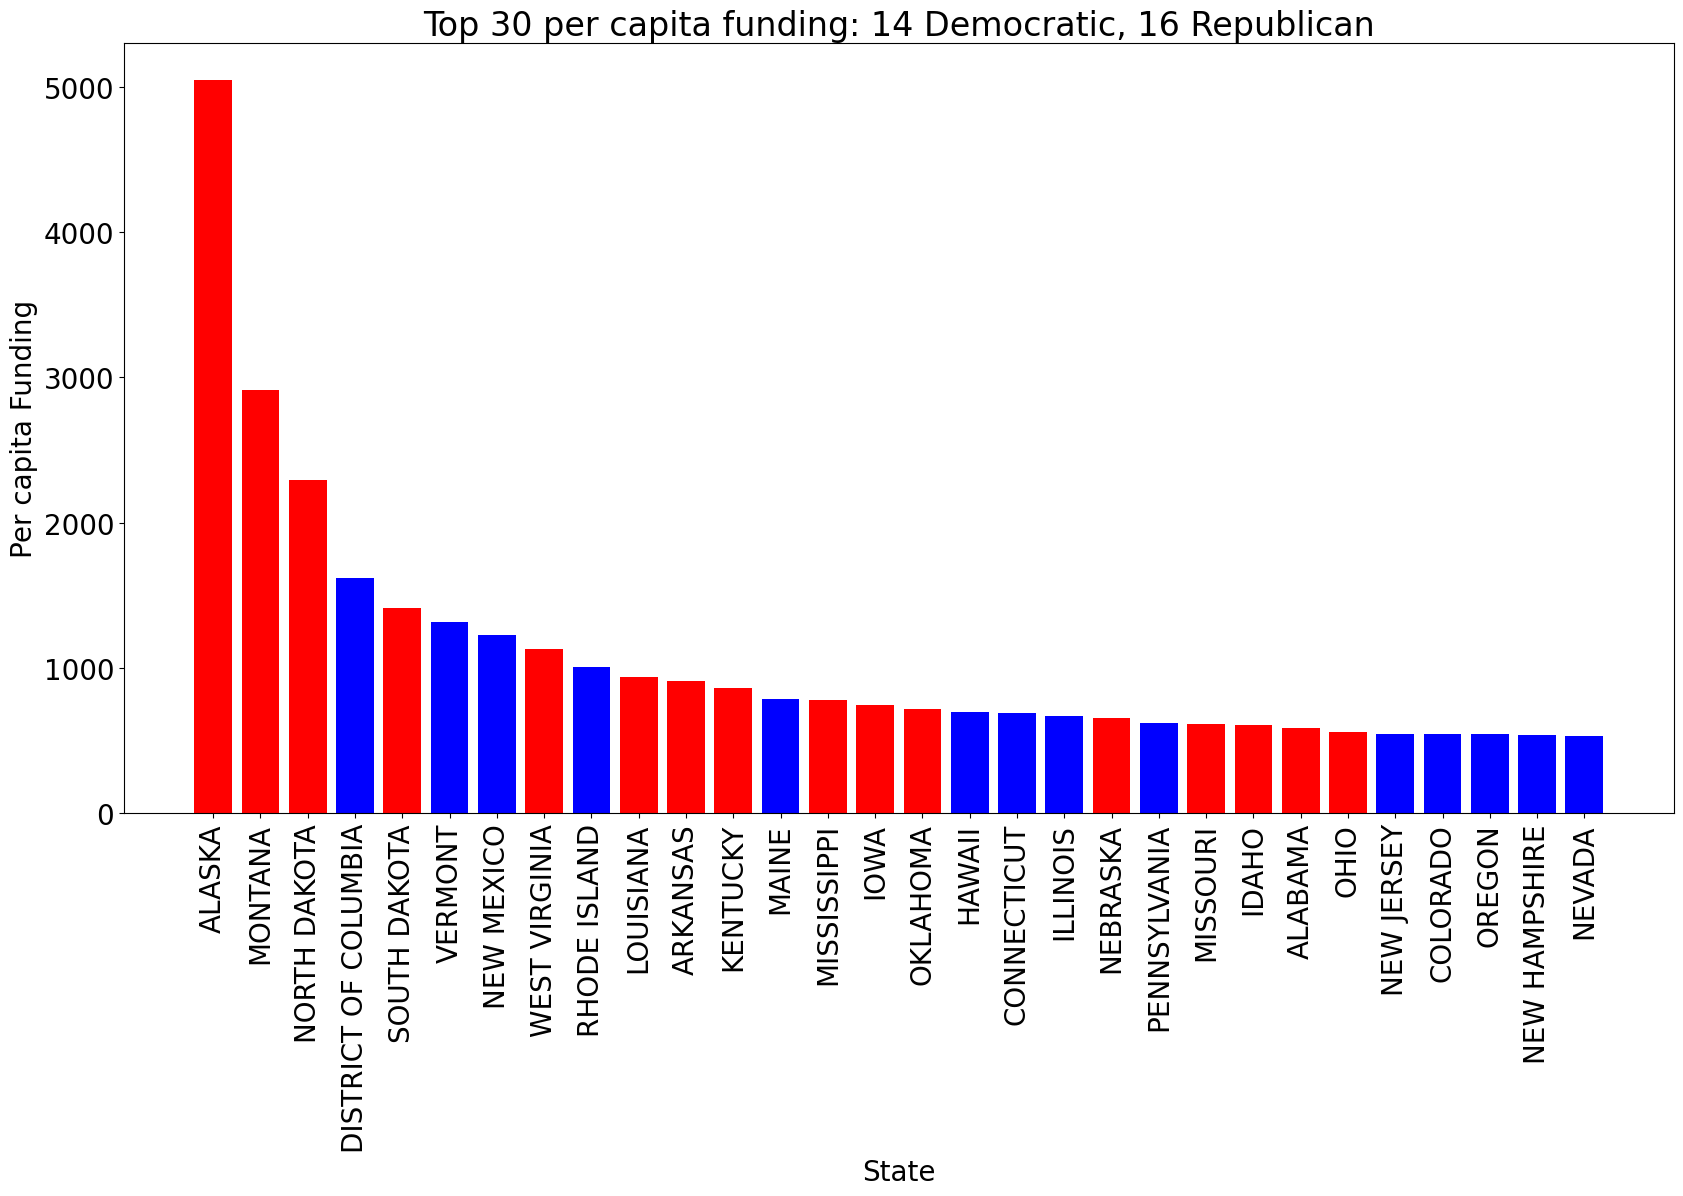

In [150]:
top_n = 30
n_largest = state_funding_percapita.nlargest(top_n, 'PER_CAPITA_FUNDING')
dems = len(n_largest[n_largest['BIDEN_WON'] == 'YES'])
reps = len(n_largest) - dems

plt.title(f'Top {top_n} per capita funding: {dems} Democratic, {reps} Republican')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = '20'
plt.xticks(rotation = 'vertical')
plt.xlabel('State')
plt.ylabel('Per capita Funding')

plt.bar(n_largest['STATE'],
        n_largest['PER_CAPITA_FUNDING'],
        color = n_largest['COLOR'],
        label=['Republican' if s == 'NO' else 'Democratic' for s in n_largest['BIDEN_WON']])
